# **vision-based cargo load** **optimization** **bold text**
---



Total Container Volume: 1000000
Used Volume: 647437
Space Utilization: 64.74%
Items Loaded: 20
Item 1: Dimensions - (40, 38, 42), Weight - 6.55953144322629
Item 2: Dimensions - (38, 45, 36), Weight - 3.778065438424693
Item 3: Dimensions - (41, 39, 36), Weight - 1.8980595415897863
Item 4: Dimensions - (40, 40, 34), Weight - 4.463250161244848
Item 5: Dimensions - (33, 43, 38), Weight - 2.0155513378546055
Item 6: Dimensions - (41, 48, 27), Weight - 5.561121179314313
Item 7: Dimensions - (46, 25, 40), Weight - 8.91394082099141
Item 8: Dimensions - (40, 31, 31), Weight - 3.6296275355421095
Item 9: Dimensions - (30, 23, 50), Weight - 4.082106302758822
Item 10: Dimensions - (44, 25, 27), Weight - 6.742428658691455
Item 11: Dimensions - (40, 34, 20), Weight - 8.533328627853582
Item 12: Dimensions - (26, 20, 48), Weight - 6.91249921454714
Item 13: Dimensions - (33, 25, 29), Weight - 4.6678429466934315
Item 14: Dimensions - (16, 21, 47), Weight - 7.079181220990819
Item 15: Dimensions - (15, 32, 

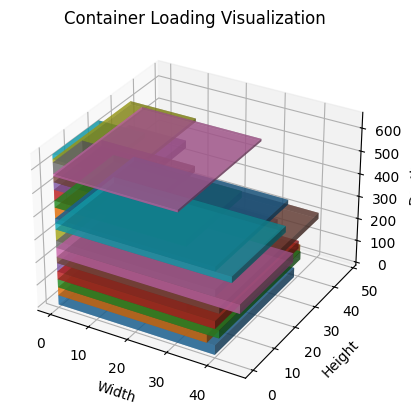

In [9]:
# Simulated 3D scanning of objects
import random

def scan_cargo_items(n=20):
    """Mock function to simulate 3D scanning of cargo items."""
    items = []
    for _ in range(n):
        width = random.randint(10, 50)
        height = random.randint(10, 50)
        depth = random.randint(10, 50)
        weight = random.uniform(1.0, 10.0)
        items.append({
            "dimensions": (width, height, depth),
            "weight": weight
        })
    return items


# Simple greedy bin-packing algorithm
import numpy as np

def fit_items_in_container(items, container_dims=(100, 100, 100)):
    container = {
        "dimensions": container_dims,
        "items": [],
        "used_space": 0
    }

    items_sorted = sorted(items, key=lambda x: np.prod(x['dimensions']), reverse=True)

    occupied_volume = 0
    for item in items_sorted:
        item_volume = np.prod(item['dimensions'])
        if occupied_volume + item_volume <= np.prod(container_dims):
            container['items'].append(item)
            occupied_volume += item_volume
        else:
            continue

    container['used_space'] = occupied_volume
    return container


def print_container_report(container):
    total_volume = container['dimensions'][0] * container['dimensions'][1] * container['dimensions'][2]
    used = container['used_space']
    print(f"Total Container Volume: {total_volume}")
    print(f"Used Volume: {used}")
    print(f"Space Utilization: {used/total_volume*100:.2f}%")
    print(f"Items Loaded: {len(container['items'])}")

    for i, item in enumerate(container['items']):
        print(f"Item {i+1}: Dimensions - {item['dimensions']}, Weight - {item['weight']}")

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_container(container):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    current_z = 0

    for item in container['items']:
        w, h, d = item['dimensions']
        ax.bar3d(0, 0, current_z, w, h, d, alpha=0.6)
        current_z += d

    ax.set_xlabel('Width')
    ax.set_ylabel('Height')
    ax.set_zlabel('Depth')
    plt.title("Container Loading Visualization")
    plt.show()

# Example usage
cargo_items = scan_cargo_items()
container = fit_items_in_container(cargo_items)
print_container_report(container)
visualize_container(container)
